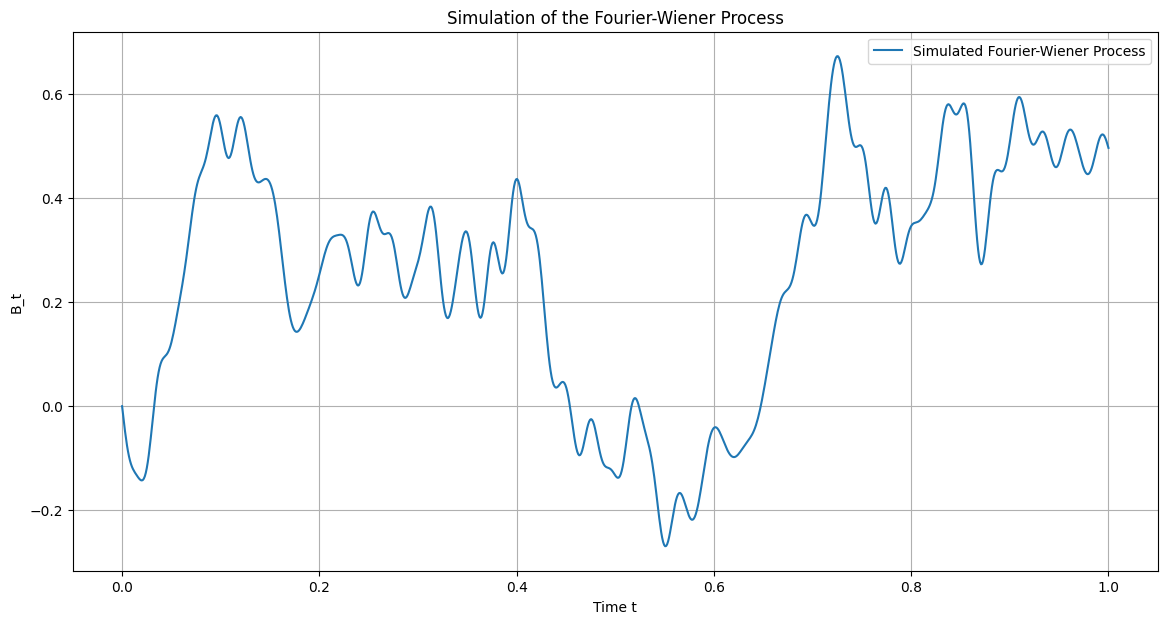

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Parameters for the simulation
timesteps = 1000  # Number of timesteps to simulate
N_terms = 100     # Number of terms in the truncated series
T = 1             # Upper bound of the time interval

# Time points at which to evaluate the process
t = np.linspace(0, T, timesteps)

# Generate the random variables xi_n from N(0,1)
xi_n = np.random.normal(0, 1, N_terms + 1)

# Function to calculate B_t at each time t
def B_t(t, xi_n, N_terms):
    B_t = xi_n[0] * t
    for n in range(1, N_terms + 1):
        B_t += xi_n[n] * np.sqrt(2) * np.sin(n * np.pi * t) / (np.pi * n)
    return B_t

# Calculate B_t for each timestep
B_t_values = np.array([B_t(time, xi_n, N_terms) for time in t])

# Plot the simulated process
plt.figure(figsize=(14, 7))
plt.plot(t, B_t_values, label='Simulated Fourier-Wiener Process')
plt.title('Simulation of the Fourier-Wiener Process')
plt.xlabel('Time t')
plt.ylabel('B_t')
plt.legend()
plt.grid(True)
plt.show()


Voici le processus de Fourier-Wiener simulé avec la série tronquée à 100 termes. Le processus a été évalué à 1000 instants dans l'intervalle [0;1]

Ce processus ressemble à un mouvement brownien, qui est caractérisé par ses chemins continus et ses accroissements normalement distribués. La simulation ci-dessus utilise une approche en série de Fourier pour approximer un mouvement brownien.

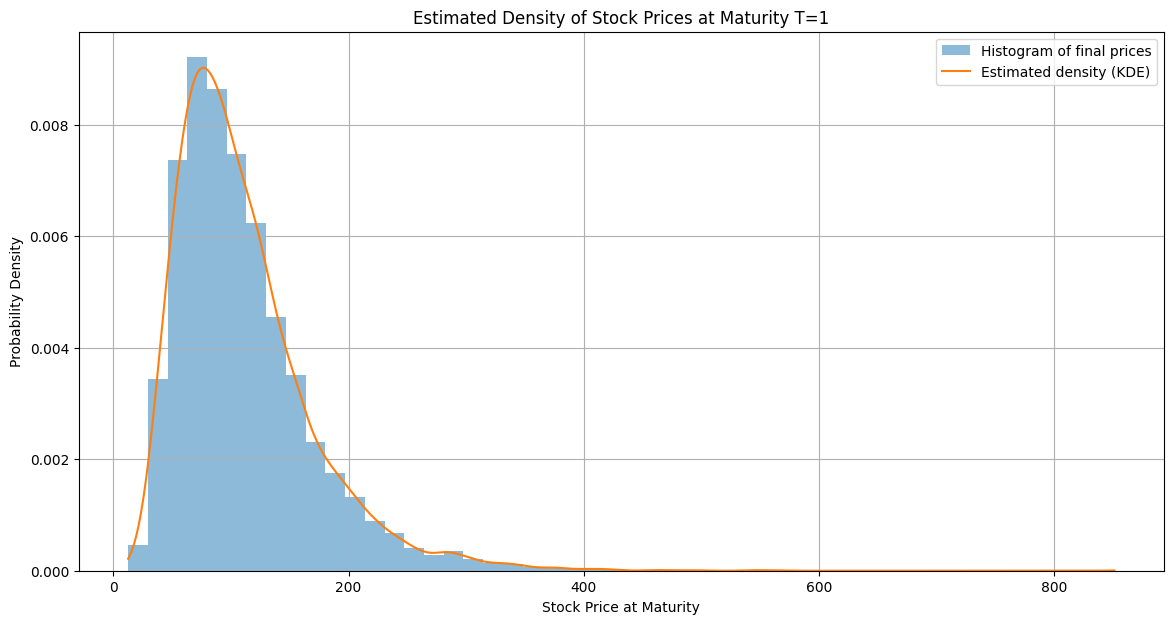

In [11]:
from scipy.stats import norm

# Black-Scholes parameters
S0 = 100        # Initial stock price
T = 1           # Maturity
mu = 0.10       # Drift
sigma = 0.50    # Volatility
dt = 1/252      # Daily time step
N = round(T/dt) # Total number of time steps

# Number of simulations
M = 10000

# Function to simulate one path of the stock price using Euler's method
def simulate_stock_path(S0, mu, sigma, dt, N):
    S = np.zeros(N)
    S[0] = S0
    for t in range(1, N):
        Z = np.random.normal(0, 1)
        S[t] = S[t-1] * (1 + mu * dt + sigma * np.sqrt(dt) * Z)
    return S

# Simulate M stock price paths
paths = np.zeros((M, N))
for i in range(M):
    paths[i] = simulate_stock_path(S0, mu, sigma, dt, N)

# Extract the final stock prices
final_prices = paths[:, -1]

# Estimate the density of the final stock prices using a kernel density estimate
from scipy.stats import gaussian_kde

# Create a Gaussian Kernel Density Estimate of the final stock prices
kde = gaussian_kde(final_prices)

# Evaluate the density estimate on a range of prices
price_range = np.linspace(final_prices.min(), final_prices.max(), 1000)
pdf = kde(price_range)

# Plot the estimated density of the final stock prices
plt.figure(figsize=(14, 7))
plt.hist(final_prices, bins=50, density=True, alpha=0.5, label='Histogram of final prices')
plt.plot(price_range, pdf, label='Estimated density (KDE)')
plt.title('Estimated Density of Stock Prices at Maturity T=1')
plt.xlabel('Stock Price at Maturity')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


On voit dans le graph ci-dessus une densité estimé pour le prix de l'action à maturité T=1 en utilisant le model de BS. L'histogramme rerésente la distribution final de l'action à partir des trajectoirs simulées et la courbe lisse est l'estimation de la fonction de densité de probabilité obtenue grace à un noyau gaussien de lissage. Cela donne une idée du prix probable du prix de l'action à maturité et de son incertitude. 

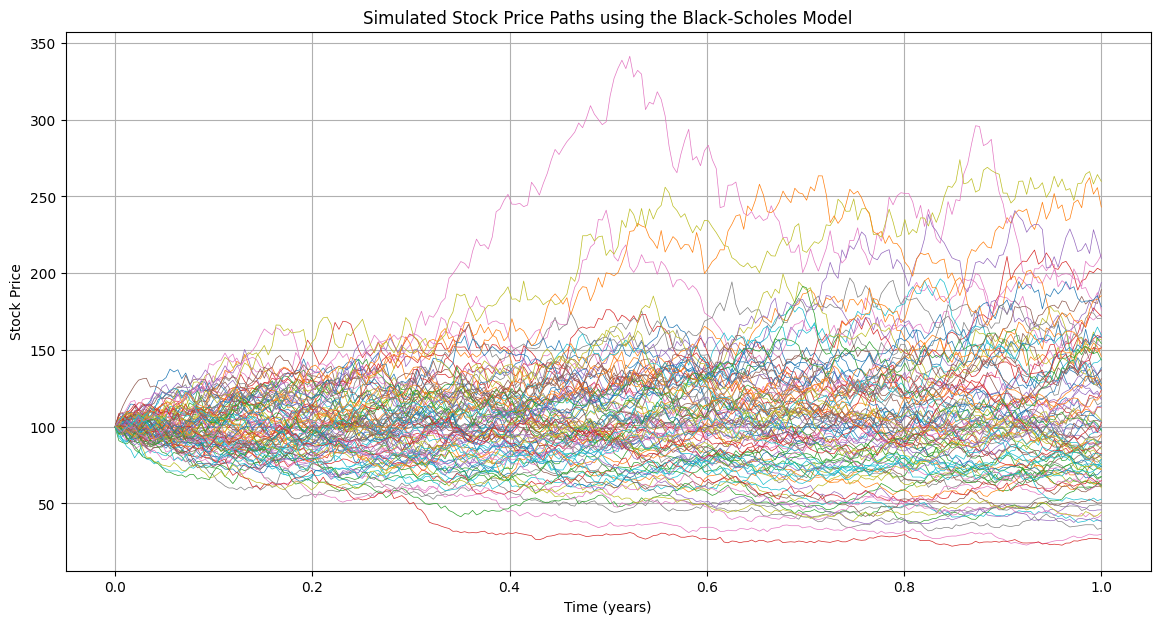

In [12]:
# Plot some of the simulated stock price paths
plt.figure(figsize=(14, 7))
# Plot only the first 100 paths to keep the graph readable
for i in range(min(100, M)):
    plt.plot(np.linspace(0, T, N), paths[i], lw=0.5)

plt.title('Simulated Stock Price Paths using the Black-Scholes Model')
plt.xlabel('Time (years)')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


On voit ici les trajectoirs prisent par la simulation. On observe que les coubes qui montent ont une plus grande volatilité ce qui se traduit pas l'asymétrie de la fonction de densité estimée plus haut. cela provient du terme mu*St*h. En effet un Drift inique une tendance générale à la hausse des prix pour des actions sur le long terme. On s'attend donc à une croissance de 10% sur un T=1.

In [8]:
np.mean(final_prices)

109.87593312929168

C'est bien ce que l'on observe. Une volatilité à 0.5 controle les risques: très peu de courbes explosent et très peu de courbes touche la barre des zéros